In [1]:
from keras.datasets import imdb

(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

D:\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# one-hot-encode
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
    # create an all-zero matrix of shape (len(sequences), dimension)
    results=np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [3]:
# Fight overfitting
# Reduce the netwok's size
from keras import models
from keras import layers

# original network
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile('rmsprop','binary_crossentropy',['accuracy'])

x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

history=model.fit(partial_x_train,partial_y_train,validation_data=(x_val,y_val),epochs=20,batch_size=512)
val_loss=history.history['val_loss']

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 207us/step - loss: 0.4976 - acc: 0.7953 - val_loss: 0.3717 - val_acc: 0.8722
Epoch 2/20
15000/15000 [==============================] - 2s 160us/step - loss: 0.2957 - acc: 0.9046 - val_loss: 0.2990 - val_acc: 0.8910
Epoch 3/20
15000/15000 [==============================] - 2s 162us/step - loss: 0.2160 - acc: 0.9286 - val_loss: 0.3088 - val_acc: 0.8713
Epoch 4/20
15000/15000 [==============================] - 2s 159us/step - loss: 0.1742 - acc: 0.9433 - val_loss: 0.2830 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 2s 159us/step - loss: 0.1414 - acc: 0.9543 - val_loss: 0.2863 - val_acc: 0.8851
Epoch 6/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.1143 - acc: 0.9653 - val_loss: 0.3086 - val_acc: 0.8811
Epoch 7/20
15000/15000 [==============================] - 2s 165us/step - loss: 0.0970 - acc: 0.9709 - val_loss: 0.3147 - 

In [4]:
# model with lower capacity
model=models.Sequential()
model.add(layers.Dense(4,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile('rmsprop','binary_crossentropy',['accuracy'])
history2=model.fit(partial_x_train,partial_y_train,validation_data=(x_val,y_val),epochs=20,batch_size=512)
val_loss2=history2.history['val_loss']

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 168us/step - loss: 0.6050 - acc: 0.7685 - val_loss: 0.5338 - val_acc: 0.8324
Epoch 2/20
15000/15000 [==============================] - 2s 149us/step - loss: 0.4635 - acc: 0.8736 - val_loss: 0.4312 - val_acc: 0.8628
Epoch 3/20
15000/15000 [==============================] - 2s 151us/step - loss: 0.3712 - acc: 0.8937 - val_loss: 0.3685 - val_acc: 0.8749
Epoch 4/20
15000/15000 [==============================] - 2s 149us/step - loss: 0.3052 - acc: 0.9095 - val_loss: 0.3337 - val_acc: 0.8755
Epoch 5/20
15000/15000 [==============================] - 2s 150us/step - loss: 0.2585 - acc: 0.9204 - val_loss: 0.3015 - val_acc: 0.8869
Epoch 6/20
15000/15000 [==============================] - 2s 150us/step - loss: 0.2233 - acc: 0.9293 - val_loss: 0.2844 - val_acc: 0.8913
Epoch 7/20
15000/15000 [==============================] - 2s 152us/step - loss: 0.1961 - acc: 0.9375 - val_loss: 0.2792 - 

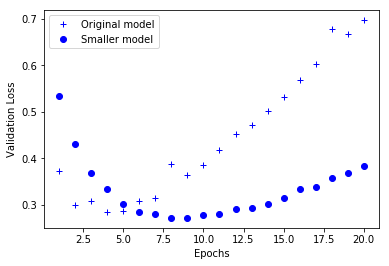

In [5]:
# A comparision of validation loss
import matplotlib.pyplot as plt

epochs=range(1,len(val_loss)+1)
plt.plot(epochs,val_loss,'b+',label='Original model')
plt.plot(epochs,val_loss2,'bo',label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

In [9]:
# Fight overfitting
# Add regularization
from keras import regularizers

# L1 regularization
# regularizers.l1(0.001)
# L1 and L2 regularization at the same time
# regularizers.l1_l2(l1=0.001,l2=0.001)

model=models.Sequential()
# l2(0.001) means that every coefficient in the weight matrix of the layer 
# will add 0.001* weight_coefficient_value to the toal loss of the network
model.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001),activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile('rmsprop','binary_crossentropy',['accuracy'])
history3=model.fit(partial_x_train,partial_y_train,validation_data=(x_val,y_val),epochs=20,batch_size=512)
val_loss3=history3.history['val_loss']

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 220us/step - loss: 0.5787 - acc: 0.7810 - val_loss: 0.4477 - val_acc: 0.8680
Epoch 2/20
15000/15000 [==============================] - 2s 161us/step - loss: 0.3718 - acc: 0.8948 - val_loss: 0.3641 - val_acc: 0.8815
Epoch 3/20
15000/15000 [==============================] - 2s 163us/step - loss: 0.2963 - acc: 0.9179 - val_loss: 0.3332 - val_acc: 0.8903
Epoch 4/20
15000/15000 [==============================] - 3s 168us/step - loss: 0.2569 - acc: 0.9307 - val_loss: 0.3486 - val_acc: 0.8783
Epoch 5/20
15000/15000 [==============================] - 2s 161us/step - loss: 0.2364 - acc: 0.9381 - val_loss: 0.3295 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 160us/step - loss: 0.2151 - acc: 0.9471 - val_loss: 0.3335 - val_acc: 0.8849
Epoch 7/20
15000/15000 [==============================] - 3s 167us/step - loss: 0.2060 - acc: 0.9501 - val_loss: 0.3412 - 

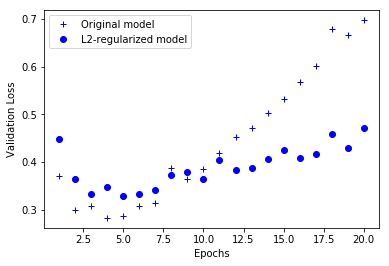

In [10]:
plt.clf()
plt.plot(epochs,val_loss,'b+',label='Original model')
plt.plot(epochs,val_loss3,'bo',label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

In [12]:
# Fight overfitting
# Add dropout

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile('rmsprop','binary_crossentropy',['accuracy'])
history4=model.fit(partial_x_train,partial_y_train,validation_data=(x_val,y_val),epochs=20,batch_size=512)
val_loss4=history4.history['val_loss']

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 252us/step - loss: 0.5942 - acc: 0.6813 - val_loss: 0.4898 - val_acc: 0.7862
Epoch 2/20
15000/15000 [==============================] - 3s 188us/step - loss: 0.4528 - acc: 0.8043 - val_loss: 0.3564 - val_acc: 0.8747
Epoch 3/20
15000/15000 [==============================] - 2s 161us/step - loss: 0.3626 - acc: 0.8585 - val_loss: 0.2992 - val_acc: 0.8861
Epoch 4/20
15000/15000 [==============================] - 3s 173us/step - loss: 0.3041 - acc: 0.8871 - val_loss: 0.2903 - val_acc: 0.8831
Epoch 5/20
15000/15000 [==============================] - 3s 177us/step - loss: 0.2609 - acc: 0.9070 - val_loss: 0.2988 - val_acc: 0.8790
Epoch 6/20
15000/15000 [==============================] - 3s 213us/step - loss: 0.2271 - acc: 0.9237 - val_loss: 0.2731 - val_acc: 0.8901
Epoch 7/20
15000/15000 [==============================] - 3s 218us/step - loss: 0.1993 - acc: 0.9345 - val_loss: 0.2831 - 

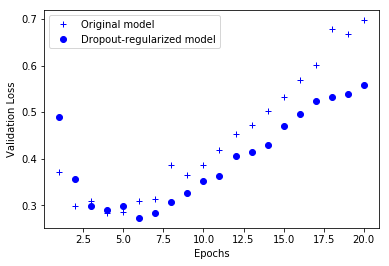

In [13]:
plt.clf()
plt.plot(epochs,val_loss,'b+',label='Original model')
plt.plot(epochs,val_loss4,'bo',label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()